<a href="https://colab.research.google.com/github/aliahalotaibi73/week5_exercises/blob/main/UntLSTM_exercis_Aliah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [24]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [25]:
dataframe = pd.read_csv('/content/traffic.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [27]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

32240 15880


In [32]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [33]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [34]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
32238/32238 - 46s - 1ms/step - loss: 9.7421e-04
Epoch 2/10
32238/32238 - 45s - 1ms/step - loss: 7.8439e-06
Epoch 3/10
32238/32238 - 81s - 3ms/step - loss: 7.8372e-06
Epoch 4/10
32238/32238 - 82s - 3ms/step - loss: 7.8313e-06
Epoch 5/10
32238/32238 - 45s - 1ms/step - loss: 7.8263e-06
Epoch 6/10
32238/32238 - 82s - 3ms/step - loss: 7.8220e-06
Epoch 7/10
32238/32238 - 44s - 1ms/step - loss: 7.8186e-06
Epoch 8/10
32238/32238 - 46s - 1ms/step - loss: 7.8167e-06
Epoch 9/10
32238/32238 - 81s - 3ms/step - loss: 7.8161e-06
Epoch 10/10
32238/32238 - 83s - 3ms/step - loss: 7.8164e-06


In [35]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Train Score: 0.01 RMSE
Test Score: 0.11 RMSE


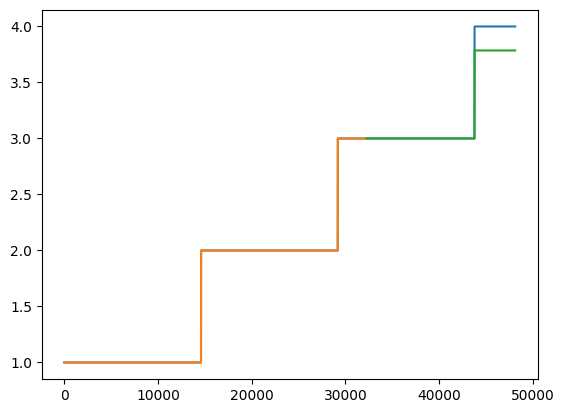

In [36]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()